In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os, glob
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [3]:
from keras.models import load_model
from keras import backend as K


Using TensorFlow backend.


In [4]:
model_pie = load_model(RESULTS_DIR+'C.Figure3.data_to_piechart/LeNet/01_noise.h5')
model_bar = load_model(RESULTS_DIR+'C.Figure3.data_to_barchart/LeNet/01_noise.h5')

In [5]:
import keras.backend as K

#
# CODE BELOW FROM https://github.com/philipperemy/keras-visualize-activations
#
def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    # Learning phase. 0 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 0.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations


def display_activations(activation_maps, outputprefix=None):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    (1, 26, 26, 32)
    (1, 24, 24, 64)
    (1, 12, 12, 64)
    (1, 12, 12, 64)
    (1, 9216)
    (1, 128)
    (1, 128)
    (1, 10)
    """
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
#             if num_activations > 1024:  # too hard to display it on the screen.
#                 square_param = int(np.floor(np.sqrt(num_activations)))
#                 activations = activations[0: square_param * square_param]
#                 activations = np.reshape(activations, (square_param, square_param))
#             else:
            activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.figure(figsize=(20,10))
        plt.imshow(activations)
        ax = plt.gca()
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        from matplotlib.ticker import NullFormatter
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_ticks_position('none') 
#         if outputprefix:
#             plt.savefig(outputprefix+str(i)+'.png', bbox_inches='tight', pad_inches=0)
#             print 'stored', outputprefix+str(i)+'.png'
#         plt.show()
        return activations

def show_nicely(data,filename=None,cmap='jet'):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    plt.figure(figsize=(20,10))
    im = plt.imshow(data, cmap=cmap)
    ax = plt.gca()
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 

    # create an axes on the right side of ax. The width of cax will be 5%
#     # of ax and the padding between cax and ax will be fixed at 0.05 inch.
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="2%", pad=0.05)
#     cax.yaxis.set_major_formatter(NullFormatter())
#     cax.yaxis.set_ticks_position('none') 

#     plt.colorbar(im, cax=cax)
    if filename:
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

In [6]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [7]:
X_bar = np.zeros((1, 100, 100), dtype=np.float32)
X_pie = np.zeros((1, 100, 100), dtype=np.float32)
y = np.zeros((1,5), dtype=np.float32)

for n in range(1):
    data,label = C.Figure3.generate_datapoint()

    image = C.Figure3.data_to_piechart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_pie[n] = image
    
    image = C.Figure3.data_to_barchart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_bar[n] = image
    
    y[n] = label
    
X_min = X_bar.min()
X_max = X_bar.max()
X_bar -= X_min
X_bar /= (X_max - X_min)
X_bar -= .5

X_min = X_pie.min()
X_max = X_pie.max()
X_pie -= X_min
X_pie /= (X_max - X_min)
X_pie -= .5

# y_min = y.min()
# y_max = y.max()
# y -= y_min
# y /= (y_max - y_min)

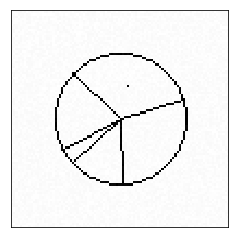

In [11]:
imshow(X_pie[0], cmap='Greys', interpolation='none')
ax = plt.gca()
ax.set_xticklabels('')
ax.set_yticklabels('')
from matplotlib.ticker import NullFormatter
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_ticks_position('none') 
plt.savefig('../PAPER/gfx/teaser_pie.pdf', bbox_inches='tight', pad_inches=0)

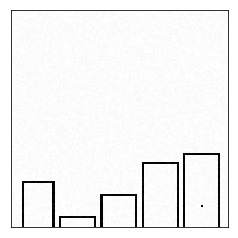

In [10]:
imshow(X_bar[0], cmap='Greys', interpolation='none')
ax = plt.gca()
ax.set_xticklabels('')
ax.set_yticklabels('')
from matplotlib.ticker import NullFormatter
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_ticks_position('none') 
plt.savefig('../PAPER/gfx/teaser_bar.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
print 'bar', model_bar.predict(X_bar.reshape(len(X_pie), 100, 100, 1))
print 'pie', model_pie.predict(X_pie.reshape(len(X_pie), 100, 100, 1))
print 'GT', y[0]

bar [[ 0.99284244  0.53181803  0.10050231  0.28156915  0.80836082]]
pie [[ 1.01296902  0.50244462  0.21348235  0.3994298   0.53644693]]
GT [ 1.          0.60606062  0.12121212  0.42424244  0.87878788]


In [13]:
import sklearn.metrics
bar_e = sklearn.metrics.mean_squared_error(model_bar.predict(X_bar.reshape(len(X_bar), 100, 100, 1))[0], y[0])
pie_e = sklearn.metrics.mean_squared_error(model_pie.predict(X_pie.reshape(len(X_pie), 100, 100, 1))[0], y[0])
print 'Bar MSE', bar_e
print 'Pie MSE', pie_e

Bar MSE 0.00626155
Pie MSE 0.0274463


In [14]:
outputs_pie_conv2d_1 = get_activations(model_pie, X_pie.reshape(len(X_pie), 100, 100, 1), layer_name='conv2d_1', print_shape_only=True)
outputs_pie_conv2d_2 = get_activations(model_pie, X_pie.reshape(len(X_pie), 100, 100, 1), layer_name='conv2d_2', print_shape_only=True)

----- activations -----
(1, 100, 100, 20)
----- activations -----
(1, 50, 50, 50)


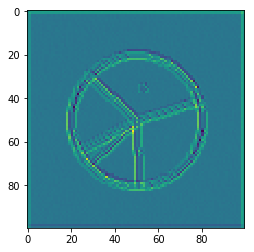

In [16]:
imshow(outputs_pie_conv2d_1[0][0,:,:,0])

Displaying activation map 0
Displaying activation map 0


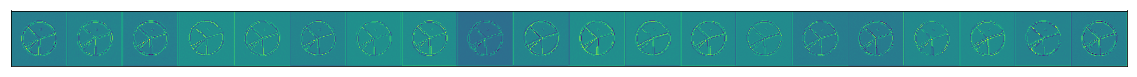

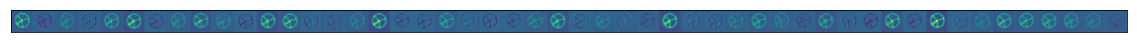

In [18]:
outputs_pie_conv2d_1_vis = display_activations(outputs_pie_conv2d_1, outputprefix='../PAPER/gfx/teaser_pie_activations_conv2d_1_')
outputs_pie_conv2d_2_vis = display_activations(outputs_pie_conv2d_2, outputprefix='../PAPER/gfx/teaser_pie_activations_conv2d_1_')

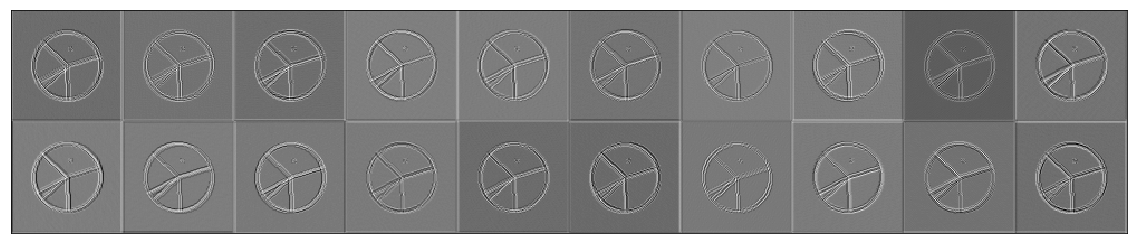

In [19]:
vis = outputs_pie_conv2d_1_vis
vis2 = np.zeros((vis.shape[0]*2, vis.shape[1]/2))
vis2[0:vis.shape[0], 0:vis2.shape[1]] = vis[:,:vis2.shape[1]]
vis2[vis.shape[0]:, 0:vis2.shape[1]] = vis[:,vis2.shape[1]:]
vis2 *= 1./vis2.max()
vis2 /= vis2.max()/1.
show_nicely(vis2,cmap='gray',filename='teaser_pie_conv2d_1.pdf')

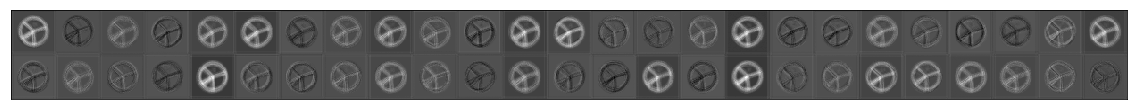

In [20]:
vis = outputs_pie_conv2d_2_vis
vis2 = np.zeros((vis.shape[0]*2, vis.shape[1]/2))
for i in range(2):
#     print i, i*vis2.shape[1],i*vis2.shape[1] + vis2.shape[1]
    vis2[i*vis.shape[0]:i*vis.shape[0] + vis.shape[0],\
         0:vis2.shape[1]] = vis[:,i*vis2.shape[1]:i*vis2.shape[1]+vis2.shape[1]]
# vis2[0:vis.shape[0], 0:vis2.shape[1]] = vis[:,:vis2.shape[1]]
# vis2[vis.shape[0]:, 0:vis2.shape[1]] = vis[:,vis2.shape[1]:]
vis2 *= 1./vis2.max()
vis2 /= vis2.max()/1.
show_nicely(vis2,cmap='gray',filename='teaser_pie_conv2d_2.pdf')

In [21]:
outputs_bar_conv2d_1 = get_activations(model_bar, X_bar.reshape(len(X_bar), 100, 100, 1), layer_name='conv2d_1', print_shape_only=True)
outputs_bar_conv2d_2 = get_activations(model_bar, X_bar.reshape(len(X_bar), 100, 100, 1), layer_name='conv2d_2', print_shape_only=True)

----- activations -----
(1, 100, 100, 20)
----- activations -----
(1, 50, 50, 50)


Displaying activation map 0
Displaying activation map 0


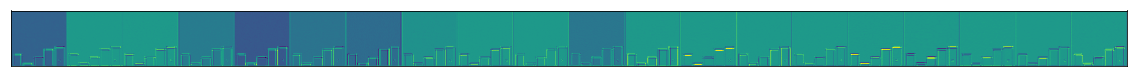

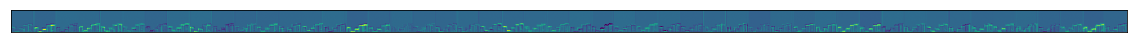

In [22]:
outputs_bar_conv2d_1_vis = display_activations(outputs_bar_conv2d_1, outputprefix='../PAPER/gfx/teaser_bar_activations_conv2d_1_')
outputs_bar_conv2d_2_vis = display_activations(outputs_bar_conv2d_2, outputprefix='../PAPER/gfx/teaser_bar_activations_conv2d_1_')

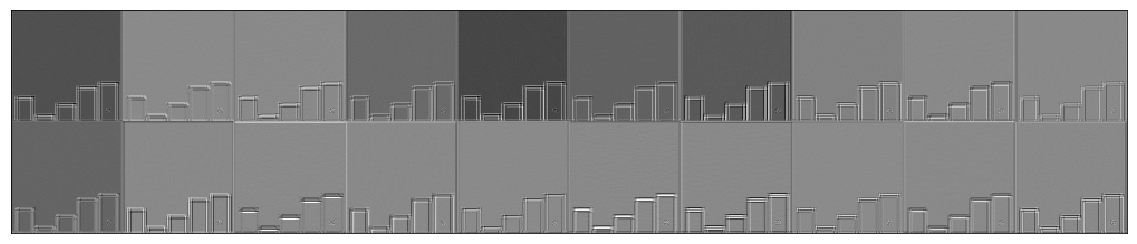

In [26]:
vis = outputs_bar_conv2d_1_vis
vis2 = np.zeros((vis.shape[0]*2, vis.shape[1]/2))
vis2[0:vis.shape[0], 0:vis2.shape[1]] = vis[:,:vis2.shape[1]]
vis2[vis.shape[0]:, 0:vis2.shape[1]] = vis[:,vis2.shape[1]:]
vis2 *= 1./vis2.max()
vis2 /= vis2.max()/1.
show_nicely(vis2,cmap='gray',filename='teaser_bar_conv2d_1.pdf')

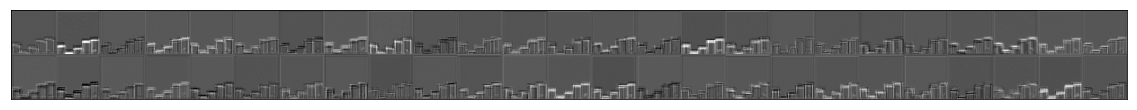

In [25]:
vis = outputs_bar_conv2d_2_vis
vis2 = np.zeros((vis.shape[0]*2, vis.shape[1]/2))
for i in range(2):
#     print i, i*vis2.shape[1],i*vis2.shape[1] + vis2.shape[1]
    vis2[i*vis.shape[0]:i*vis.shape[0] + vis.shape[0],\
         0:vis2.shape[1]] = vis[:,i*vis2.shape[1]:i*vis2.shape[1]+vis2.shape[1]]
# vis2[0:vis.shape[0], 0:vis2.shape[1]] = vis[:,:vis2.shape[1]]
# vis2[vis.shape[0]:, 0:vis2.shape[1]] = vis[:,vis2.shape[1]:]
vis2 *= 1./vis2.max()
vis2 /= vis2.max()/1.
show_nicely(vis2,cmap='gray',filename='teaser_bar_conv2d_2.pdf')

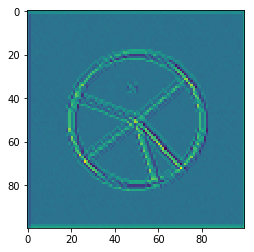

In [335]:
imshow(outputs_pie[0][0,:,:,0])

Displaying activation map 0
stored ../PAPER/gfx/teaser_bar_activations_0.png


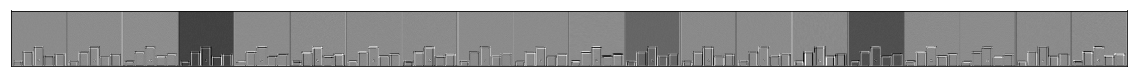

Displaying activation map 1
stored ../PAPER/gfx/teaser_bar_activations_1.png


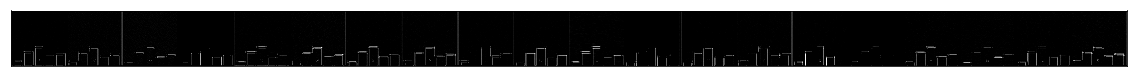

Displaying activation map 2
stored ../PAPER/gfx/teaser_bar_activations_2.png


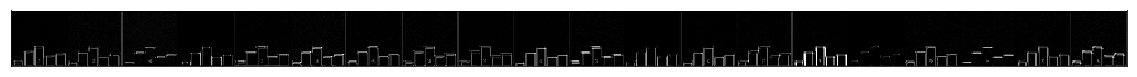

Displaying activation map 3
stored ../PAPER/gfx/teaser_bar_activations_3.png


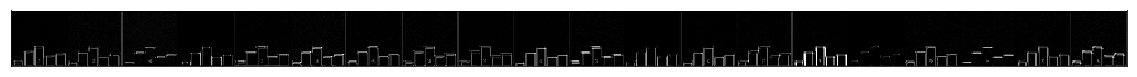

Displaying activation map 4
stored ../PAPER/gfx/teaser_bar_activations_4.png


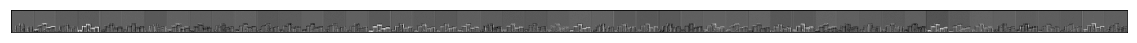

Displaying activation map 5
stored ../PAPER/gfx/teaser_bar_activations_5.png


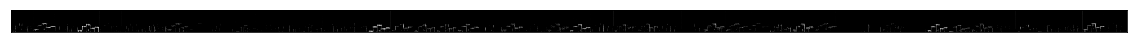

Displaying activation map 6
stored ../PAPER/gfx/teaser_bar_activations_6.png


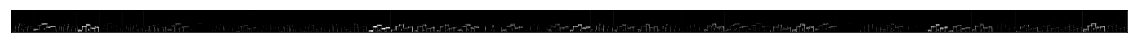

Displaying activation map 7
stored ../PAPER/gfx/teaser_bar_activations_7.png


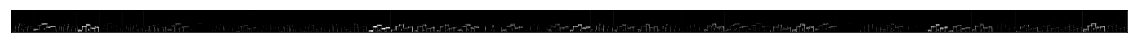

Displaying activation map 8
stored ../PAPER/gfx/teaser_bar_activations_8.png


Displaying activation map 9
stored ../PAPER/gfx/teaser_bar_activations_9.png


Displaying activation map 10
stored ../PAPER/gfx/teaser_bar_activations_10.png


Displaying activation map 11
stored ../PAPER/gfx/teaser_bar_activations_11.png


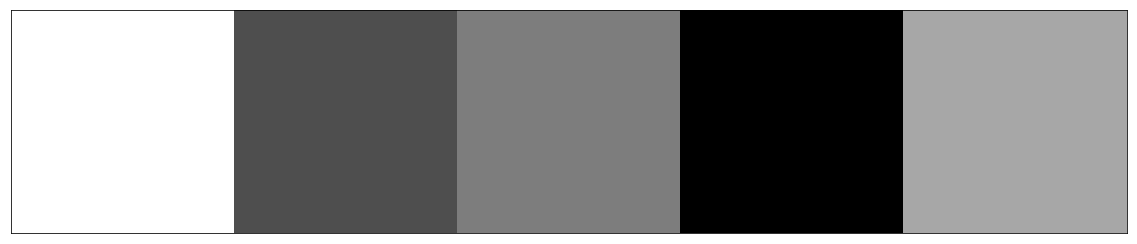

In [344]:
vis = display_activations(outputs_bar, outputprefix='../PAPER/gfx/teaser_bar_activations_')

In [322]:
W = model_pie.layers[4].get_weights()

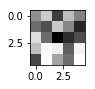

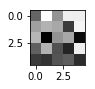

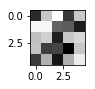

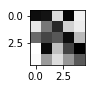

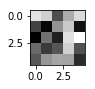

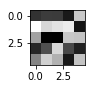

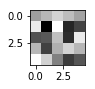

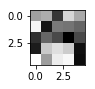

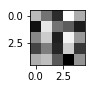

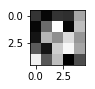

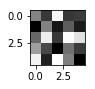

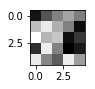

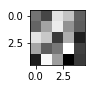

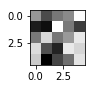

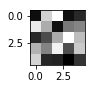

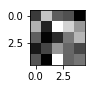

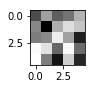

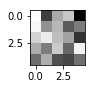

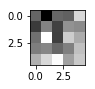

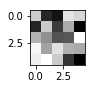

In [326]:
for i in range(20):
    plt.figure(figsize=(1,1))
    imshow(W[0][:,:,0,i],cmap='gray')